 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [9]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [10]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.EDA ( Exploratory Data Analysis)</p>

#### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A1.Reading Data</p>

In [12]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
surv = train['Survived'].value_counts()
surv

Survived
0    549
1    342
Name: count, dtype: int64

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A2.Data Size</p>

In [16]:
train.shape

(891, 12)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A3.Data Types</p>

In [ ]:
train.info()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">A4.Summary Statistics</p>

In [ ]:
train.describe()

In [17]:
train = train.sample(frac=1).reset_index(drop=True)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
1,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
2,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S
3,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
4,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
5,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
6,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
7,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
8,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
9,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S


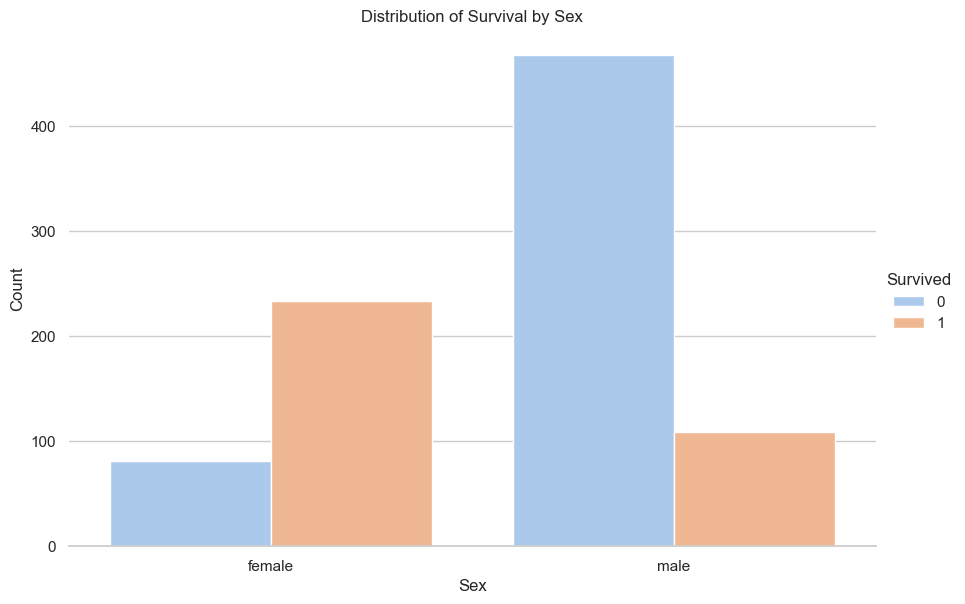

In [18]:
grouped = train.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
grouped.head()

sns.set(style="whitegrid")

# Create bar plot
g = sns.catplot(
    data = grouped, 
    x = 'Sex', 
    y = 'Count', 
    hue = 'Survived', 
    kind = 'bar', 
    palette = 'pastel', 
    height = 6, 
    aspect = 1.5
)

# Titles and labels
g.despine(left=True)
g.set_axis_labels("Sex", "Count")
g.legend.set_title("Survived")
plt.title("Distribution of Survival by Sex")

plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">B.Data Pre-processing</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B1.Missing Values</p>

In [19]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [24]:
def null_percent(df):
    per=((df.isnull().sum()/len(df))*100).round(5)
    per.sort_values(ascending=False,inplace =True)
    return per
print("Nan Values in train data:")
print(null_percent(train))

print("Nan Values in test data:")
print(null_percent(test))

Nan Values in train data:
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64
Nan Values in test data:
PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64


 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B2.Filling Nulls</p>

In [ ]:
train['Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Cabin'] = test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

train['Cabin'] = train['Cabin'].map({1:True, 0:False})
test['Cabin'] = test['Cabin'].map({1:True, 0:False})

In [21]:
numerical_cols = train.select_dtypes(exclude=['object', 'category'])
numerical_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [22]:
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = train.select_dtypes(include=['object', 'category'])

In [23]:
def fill_empty_categorical(df):
    for i in categorical_cols:
        df[i].fillna(df[i].mode()[0], inplace=True)
    return df

def fill_empty_numerical(df):
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)  
    return df

train = fill_empty_categorical(train)
train = fill_empty_numerical(train)

test = fill_empty_categorical(test)
test = fill_empty_numerical(test)

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B3.Remove Duplicates and Unnecessary Columns</p>

In [25]:
train.duplicated().sum()

0

In [26]:
test.duplicated().sum()

0

In [27]:
train = train.drop(["Name"], axis=1).copy()
test = test.drop(["Name"], axis=1).copy()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">B5.Aggregate Features</p>

In [39]:
train_features = train[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_label = train[['Survived']]

test_features = test[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

KeyError: "['Sex', 'Embarked'] not in index"

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C.Data Processing</p>

In [29]:
X = train.drop(columns=['Survived']).copy()
y = train['Survived']

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C1.Get Dummies</p>

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [34]:
# categorical columns with parameters less than 11
categorical_cols = [cname for cname in X.columns if  
                        X[cname].dtype in ['category','object'] and X[cname].nunique() <5]
categorical_cols

['Sex', 'Embarked']

In [36]:
X = pd.get_dummies(X, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C5.Encoding Categorical</p>

In [62]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index(['Ticket', 'Cabin'], dtype='object')

In [63]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X[categorical_columns] = encoder.fit_transform(X[categorical_columns].astype(str))
test[categorical_columns] = encoder.fit_transform(test[categorical_columns].astype(str))

In [64]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,367,1,60.0,1,0,4.0,75.2500,104.0,True,False,True,False,False
1,159,3,28.0,0,0,258.0,8.6625,47.0,False,True,False,False,True
2,549,3,33.0,1,1,423.0,20.5250,47.0,False,True,False,False,True
3,763,3,20.0,0,0,191.0,7.2292,47.0,False,True,True,False,False
4,596,3,36.0,1,1,307.0,24.1500,47.0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,562,3,40.0,0,0,389.0,7.8958,47.0,False,True,False,False,True
887,429,3,28.0,0,0,437.0,7.7500,47.0,False,True,False,True,False
888,619,2,4.0,2,1,114.0,39.0000,144.0,True,False,False,False,True
889,652,2,18.0,0,1,117.0,23.0000,47.0,True,False,False,False,True


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C2.Normalizing - Scaling Data (optional)</p>

MinMaxScaler doesn't reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [70]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

In [66]:
features=['Age','Fare','Pclass','SibSp','Parch']
features

['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

In [67]:
X[features]

,Age,Fare,Pclass,SibSp,Parch
0,60.0,75.2500,1,1,0
1,28.0,8.6625,3,0,0
2,33.0,20.5250,3,1,1
3,20.0,7.2292,3,0,0
4,36.0,24.1500,3,1,1
...,...,...,...,...,...
886,40.0,7.8958,3,0,0
887,28.0,7.7500,3,0,0
888,4.0,39.0000,2,2,1
889,18.0,23.0000,2,0,1


In [69]:
scaler = MinMaxScaler()
X[features] = pd.DataFrame(scaler.fit_transform(X), columns=X[features])
test[features] = pd.DataFrame(scaler.fit_transform(test), columns=test[features])

ValueError: Index data must be 1-dimensional

In [65]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X[['Age','Fare','Pclass','SibSp','Parch']].columns)
test = pd.DataFrame(scaler.fit_transform(test), columns=test[['Age','Fare','Pclass','SibSp','Parch']].columns)

ValueError: Shape of passed values is (891, 13), indices imply (891, 5)

In [74]:
X.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.748681,0.125,0.000000,0.005882,0.146878,0.712329,1.0,0.0,1.0,0.0,0.0
1,1.0,0.346569,0.000,0.000000,0.379412,0.016908,0.321918,0.0,1.0,0.0,0.0,1.0
2,1.0,0.409399,0.125,0.166667,0.622059,0.040062,0.321918,0.0,1.0,0.0,0.0,1.0
3,1.0,0.246042,0.000,0.000000,0.280882,0.014110,0.321918,0.0,1.0,1.0,0.0,0.0
4,1.0,0.447097,0.125,0.166667,0.451471,0.047138,0.321918,0.0,1.0,0.0,0.0,1.0


#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">C8.Delete unnecessary columns</p>

In [72]:
X = X.drop(["PassengerId"], axis=1).copy()
test = test.drop(["PassengerId"], axis=1).copy()

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=150, verbose=2, validation_split = 0.2)

Epoch 1/150
23/23 - 1s - 55ms/step - accuracy: 0.6784 - loss: 0.6039 - val_accuracy: 0.8212 - val_loss: 0.4807
Epoch 2/150
23/23 - 0s - 2ms/step - accuracy: 0.7795 - loss: 0.5074 - val_accuracy: 0.7989 - val_loss: 0.4381
Epoch 3/150
23/23 - 0s - 2ms/step - accuracy: 0.7978 - loss: 0.4705 - val_accuracy: 0.8156 - val_loss: 0.4231
Epoch 4/150
23/23 - 0s - 2ms/step - accuracy: 0.8006 - loss: 0.4684 - val_accuracy: 0.8492 - val_loss: 0.4136
Epoch 5/150
23/23 - 0s - 3ms/step - accuracy: 0.7949 - loss: 0.4689 - val_accuracy: 0.8101 - val_loss: 0.4237
Epoch 6/150
23/23 - 0s - 2ms/step - accuracy: 0.8006 - loss: 0.4454 - val_accuracy: 0.8547 - val_loss: 0.4011
Epoch 7/150
23/23 - 0s - 2ms/step - accuracy: 0.7963 - loss: 0.4599 - val_accuracy: 0.8380 - val_loss: 0.3977
Epoch 8/150
23/23 - 0s - 2ms/step - accuracy: 0.7978 - loss: 0.4611 - val_accuracy: 0.8324 - val_loss: 0.4081
Epoch 9/150
23/23 - 0s - 2ms/step - accuracy: 0.8034 - loss: 0.4479 - val_accuracy: 0.8547 - val_loss: 0.3928
Epoch 10/

Epoch 75/150
23/23 - 0s - 2ms/step - accuracy: 0.8343 - loss: 0.3725 - val_accuracy: 0.8771 - val_loss: 0.3678
Epoch 76/150
23/23 - 0s - 2ms/step - accuracy: 0.8371 - loss: 0.3816 - val_accuracy: 0.8436 - val_loss: 0.3697
Epoch 77/150
23/23 - 0s - 2ms/step - accuracy: 0.8455 - loss: 0.3782 - val_accuracy: 0.8547 - val_loss: 0.3676
Epoch 78/150
23/23 - 0s - 3ms/step - accuracy: 0.8385 - loss: 0.3811 - val_accuracy: 0.8492 - val_loss: 0.3701
Epoch 79/150
23/23 - 0s - 2ms/step - accuracy: 0.8272 - loss: 0.3832 - val_accuracy: 0.8603 - val_loss: 0.3739
Epoch 80/150
23/23 - 0s - 3ms/step - accuracy: 0.8174 - loss: 0.3828 - val_accuracy: 0.8603 - val_loss: 0.3706
Epoch 81/150
23/23 - 0s - 3ms/step - accuracy: 0.8455 - loss: 0.3698 - val_accuracy: 0.8547 - val_loss: 0.3740
Epoch 82/150
23/23 - 0s - 3ms/step - accuracy: 0.8469 - loss: 0.3743 - val_accuracy: 0.8547 - val_loss: 0.3726
Epoch 83/150
23/23 - 0s - 2ms/step - accuracy: 0.8301 - loss: 0.3741 - val_accuracy: 0.8659 - val_loss: 0.3701
E

Epoch 149/150
23/23 - 0s - 3ms/step - accuracy: 0.8610 - loss: 0.3310 - val_accuracy: 0.8547 - val_loss: 0.3839
Epoch 150/150
23/23 - 0s - 2ms/step - accuracy: 0.8680 - loss: 0.3279 - val_accuracy: 0.8603 - val_loss: 0.3888


In [76]:
train_features.shape

(891, 7)

In [77]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import activations
# from tensorflow.keras import optimizers

In [78]:
# import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score

In [79]:
model_3 = Sequential([
#     Flatten(input_shape = (891, 10)),   #input layer
    Flatten(),                            #input layer
    Dense(256, activation=relu),          #hidden layers
    Dropout(0.5),
    Dense(128, activation=relu),
    Dropout(0.25),
    Dense(64, activation=relu),
    Dense(1, activation=sigmoid)        #output layer
#   Dense(1, activation=softmax)
])

In [80]:
model_2 = Sequential()
model_2.add(Flatten())
model_2.add(Dense(units=128, activation=relu))
model_2.add(Dense(units=64, activation=relu))
model_2.add(Dense(1, activation=sigmoid))

In [81]:
model_2.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
# history = model.fit(train_features, train_label, epochs=150, verbose=2, validation_split = 0.2)

In [83]:
test_2 = model_2.fit(X, y, 
                     epochs=150, 
                     validation_split = 0.2)

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3770 - loss: 0.7639 - val_accuracy: 0.3911 - val_loss: 0.7074
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4967 - loss: 0.6914 - val_accuracy: 0.7598 - val_loss: 0.6631
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.6547 - val_accuracy: 0.7486 - val_loss: 0.6368
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7364 - loss: 0.6351 - val_accuracy: 0.7598 - val_loss: 0.6172
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7539 - loss: 0.6196 - val_accuracy: 0.7821 - val_loss: 0.6005
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7391 - loss: 0.6162 - val_accuracy: 0.7877 - val_loss: 0.5865
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7862 - loss: 0.5897 - val_accuracy: 0.7989 - val_loss: 0.5736
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7662 - loss: 0.5829 - val_accuracy: 0.7877 - v

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8130 - loss: 0.4273 - val_accuracy: 0.8156 - val_loss: 0.4203
Epoch 102/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7655 - loss: 0.4878 - val_accuracy: 0.8156 - val_loss: 0.4199
Epoch 103/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7928 - loss: 0.4634 - val_accuracy: 0.8156 - val_loss: 0.4203
Epoch 104/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7649 - loss: 0.4801 - val_accuracy: 0.8156 - val_loss: 0.4196
Epoch 105/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.4520 - val_accuracy: 0.8156 - val_loss: 0.4191
Epoch 106/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7697 - loss: 0.4760 - val_accuracy: 0.8212 - val_loss: 0.4185
Epoch 107/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8010 - loss: 0.4379 - val_accuracy: 0.8212 - val_loss: 0.4182
Epoch 108/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8001 - loss: 0.4536 - val_accuracy: 0.8212

In [84]:
test_2.history['accuracy']

[0.37780898809432983,
 0.608146071434021,
 0.7612359523773193,
 0.7443820238113403,
 0.7485954761505127,
 0.7640449404716492,
 0.7710674405097961,
 0.7823033928871155,
 0.7724719047546387,
 0.7752808928489685,
 0.766853928565979,
 0.7682584524154663,
 0.7682584524154663,
 0.7682584524154663,
 0.7696629166603088,
 0.7696629166603088,
 0.7696629166603088,
 0.7696629166603088,
 0.7696629166603088,
 0.7696629166603088,
 0.7696629166603088,
 0.7724719047546387,
 0.7752808928489685,
 0.7808988690376282,
 0.7851123809814453,
 0.7794944047927856,
 0.783707857131958,
 0.783707857131958,
 0.783707857131958,
 0.783707857131958,
 0.7823033928871155,
 0.7823033928871155,
 0.7823033928871155,
 0.783707857131958,
 0.783707857131958,
 0.783707857131958,
 0.783707857131958,
 0.7851123809814453,
 0.783707857131958,
 0.7851123809814453,
 0.7851123809814453,
 0.783707857131958,
 0.783707857131958,
 0.7851123809814453,
 0.7851123809814453,
 0.783707857131958,
 0.783707857131958,
 0.783707857131958,
 0.7837

In [85]:
test_2.history['val_accuracy']

[0.3910614550113678,
 0.7597765326499939,
 0.748603343963623,
 0.7597765326499939,
 0.7821229100227356,
 0.7877094745635986,
 0.7988826632499695,
 0.7877094745635986,
 0.7932960987091064,
 0.7932960987091064,
 0.7765362858772278,
 0.7709497213363647,
 0.7709497213363647,
 0.7709497213363647,
 0.7709497213363647,
 0.7709497213363647,
 0.7709497213363647,
 0.7709497213363647,
 0.7709497213363647,
 0.7765362858772278,
 0.7765362858772278,
 0.7765362858772278,
 0.7821229100227356,
 0.7821229100227356,
 0.7932960987091064,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.7988826632499695,
 0.79888266324

In [86]:
test_2.history['loss']

[0.7431201934814453,
 0.6826415061950684,
 0.6517115831375122,
 0.6317280530929565,
 0.6156257390975952,
 0.601402223110199,
 0.5892291069030762,
 0.5778862237930298,
 0.5673125982284546,
 0.5580461621284485,
 0.5491687059402466,
 0.5410789847373962,
 0.533504068851471,
 0.5267763733863831,
 0.5206975340843201,
 0.5155966281890869,
 0.5107274651527405,
 0.5061969757080078,
 0.501737654209137,
 0.4981127083301544,
 0.4948437213897705,
 0.4920641779899597,
 0.4898466467857361,
 0.4875554144382477,
 0.48538365960121155,
 0.48365315794944763,
 0.4819364547729492,
 0.48033398389816284,
 0.478999525308609,
 0.4776228964328766,
 0.4764753580093384,
 0.475326269865036,
 0.47423839569091797,
 0.47338443994522095,
 0.4723687469959259,
 0.4716404974460602,
 0.4707614481449127,
 0.46982020139694214,
 0.46935930848121643,
 0.4685003161430359,
 0.4676220118999481,
 0.4669937491416931,
 0.4662187993526459,
 0.4656480550765991,
 0.46503719687461853,
 0.46436700224876404,
 0.46351802349090576,
 0.46295

In [84]:
test_2.history['val_loss']

[0.42166611552238464,
 0.42362943291664124,
 0.42257335782051086,
 0.42278122901916504,
 0.4231681525707245,
 0.4256974160671234,
 0.4242580533027649,
 0.42543041706085205,
 0.42569565773010254,
 0.42534974217414856,
 0.4260690212249756,
 0.4264477789402008,
 0.4270472228527069,
 0.4268254041671753,
 0.427199125289917,
 0.4277678430080414,
 0.42819494009017944,
 0.4283449053764343,
 0.42843303084373474,
 0.4280499815940857,
 0.4284926652908325,
 0.4285435676574707,
 0.4293687641620636,
 0.429051011800766,
 0.4291587769985199,
 0.42958319187164307,
 0.4297676682472229,
 0.43002787232398987,
 0.4302867352962494,
 0.43234172463417053,
 0.43001723289489746,
 0.43081071972846985,
 0.431031733751297,
 0.4308622479438782,
 0.43115323781967163,
 0.4321346580982208,
 0.43404197692871094,
 0.4320034980773926,
 0.43220973014831543,
 0.43177589774131775,
 0.43191656470298767,
 0.4315226376056671,
 0.4320774972438812,
 0.43213656544685364,
 0.43171989917755127,
 0.43248632550239563,
 0.432476073503

In [88]:
history.history['accuracy']

[0.658707857131958,
 0.7949438095092773,
 0.800561785697937,
 0.7935393452644348,
 0.8033707737922668,
 0.8146067261695862,
 0.824438214302063,
 0.8047752976417542,
 0.8146067261695862,
 0.800561785697937,
 0.8103932738304138,
 0.8089887499809265,
 0.817415714263916,
 0.8230336904525757,
 0.8103932738304138,
 0.8216292262077332,
 0.8146067261695862,
 0.817415714263916,
 0.8047752976417542,
 0.8230336904525757,
 0.8202247023582458,
 0.8103932738304138,
 0.8132022619247437,
 0.8089887499809265,
 0.8089887499809265,
 0.8146067261695862,
 0.8089887499809265,
 0.824438214302063,
 0.817415714263916,
 0.8286516666412354,
 0.8286516666412354,
 0.824438214302063,
 0.8286516666412354,
 0.8384831547737122,
 0.8356741666793823,
 0.8370786309242249,
 0.8384831547737122,
 0.8300561904907227,
 0.8258426785469055,
 0.824438214302063,
 0.8370786309242249,
 0.834269642829895,
 0.8328651785850525,
 0.8328651785850525,
 0.8258426785469055,
 0.834269642829895,
 0.8314606547355652,
 0.8188202381134033,
 0.8

In [87]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,637 (522.02 KB)

 Trainable params: 44,545 (174.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,092 (348.02 KB)

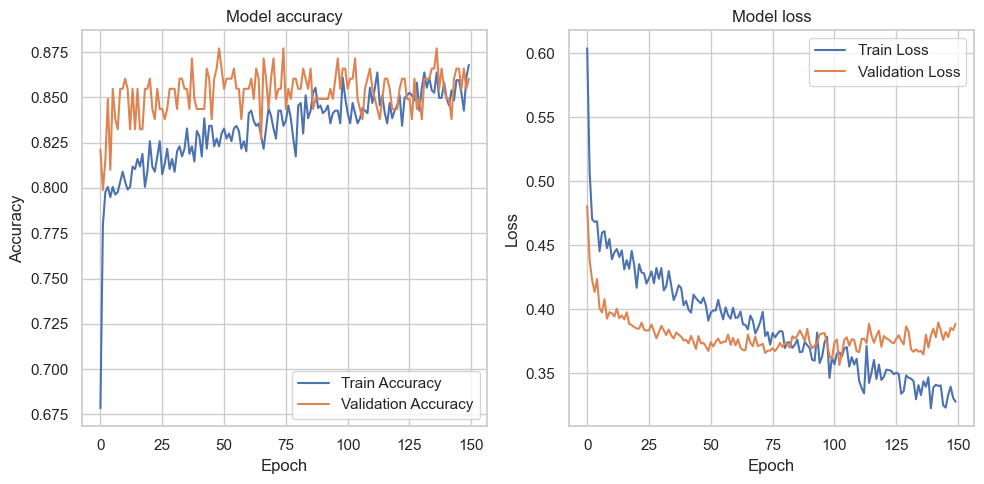

In [88]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [85]:
test_labels = model.predict(test_features)
test_labels = (test_labels > 0.5).astype(int).flatten()
# test_labels = [0 if val < 0.5 else 1 for val in test_labels]
test_labels = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_labels})

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
test_labels.to_csv('submission.csv', index=False)
